In [1]:
# Install packages if not already installed
install.packages(c("MASS", "e1071", "ggplot2", "caret"))

# Load libraries
library(MASS)   # For LDA and QDA
library(e1071)  # For Naïve Bayes
library(ggplot2)
library(caret)  # For evaluation metrics


Installing packages into 'C:/Users/HP/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'MASS' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked
package 'ggplot2' successfully unpacked and MD5 sums checked
package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Windows\Temp\RtmpiY8d0h\downloaded_packages


Warning message:
"package 'MASS' was built under R version 4.4.1"
Warning message:
"package 'e1071' was built under R version 4.4.1"
Warning message:
"package 'ggplot2' was built under R version 4.4.1"
Warning message:
"package 'caret' was built under R version 4.4.1"
Loading required package: lattice



In [2]:
# Simulate some stock market data
set.seed(42)
n <- 500  # Number of observations
data <- data.frame(
  Open = rnorm(n, mean = 100, sd = 5),
  High = rnorm(n, mean = 102, sd = 5),
  Low = rnorm(n, mean = 98, sd = 5),
  Close = rnorm(n, mean = 100, sd = 5),
  Volume = sample(500:1000, n, replace = TRUE),
  Direction = sample(c("Up", "Down"), n, replace = TRUE)  # Target variable
)

head(data)


,Open,High,Low,Close,Volume,Direction
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,106.85479,107.14570,109.62529,96.99309,839,Down
2,97.17651,106.57387,100.62061,99.32092,512,Up
3,101.81564,101.98772,102.85367,95.06364,582,Down
4,103.16431,102.68005,99.88487,104.15963,711,Up
5,102.02134,98.39923,93.02033,96.02470,686,Up
6,99.46938,101.00938,95.01259,101.70232,943,Down


In [3]:
# Split data into 70% training and 30% testing
set.seed(123)
trainIndex <- createDataPartition(data$Direction, p = 0.7, list = FALSE)
trainData <- data[trainIndex, ]
testData <- data[-trainIndex, ]


In [4]:
lda_model <- lda(Direction ~ Open + High + Low + Close + Volume, data = trainData)
lda_pred <- predict(lda_model, testData)$class
qda_model <- qda(Direction ~ Open + High + Low + Close + Volume, data = trainData)
qda_pred <- predict(qda_model, testData)$class
nb_model <- naiveBayes(Direction ~ Open + High + Low + Close + Volume, data = trainData)
nb_pred <- predict(nb_model, testData)


In [5]:
# Ensure actual values and predictions are factors with identical levels
testData$Direction <- factor(testData$Direction)  # Ensure Direction is a factor

lda_pred <- factor(lda_pred, levels = levels(testData$Direction))
qda_pred <- factor(qda_pred, levels = levels(testData$Direction))
nb_pred <- factor(nb_pred, levels = levels(testData$Direction))


In [6]:
# Generate confusion matrices
lda_cm <- confusionMatrix(lda_pred, testData$Direction)
qda_cm <- confusionMatrix(qda_pred, testData$Direction)
nb_cm <- confusionMatrix(nb_pred, testData$Direction)

# Print the accuracy of each model
cat("LDA Accuracy:", lda_cm$overall['Accuracy'], "\n")
cat("QDA Accuracy:", qda_cm$overall['Accuracy'], "\n")
cat("Naïve Bayes Accuracy:", nb_cm$overall['Accuracy'], "\n")


LDA Accuracy: 0.5133333 
QDA Accuracy: 0.54 
Naïve Bayes Accuracy: 0.5133333 


In [7]:
# Ensure testData$Direction is a factor
testData$Direction <- factor(testData$Direction, levels = c("Up", "Down"))

# Align predictions with actual factor levels
lda_pred <- factor(lda_pred, levels = levels(testData$Direction))
qda_pred <- factor(qda_pred, levels = levels(testData$Direction))
nb_pred <- factor(nb_pred, levels = levels(testData$Direction))


In [8]:
# Check distribution of predictions vs actual values
table(lda_pred, testData$Direction)
table(qda_pred, testData$Direction)
table(nb_pred, testData$Direction)


        
lda_pred Up Down
    Up   16   20
    Down 53   61

        
qda_pred Up Down
    Up   18   18
    Down 51   63

       
nb_pred Up Down
   Up   14   18
   Down 55   63

In [9]:
# Generate confusion matrices
lda_cm <- confusionMatrix(lda_pred, testData$Direction)
qda_cm <- confusionMatrix(qda_pred, testData$Direction)
nb_cm <- confusionMatrix(nb_pred, testData$Direction)

# Print accuracies
cat("LDA Accuracy:", lda_cm$overall['Accuracy'], "\n")
cat("QDA Accuracy:", qda_cm$overall['Accuracy'], "\n")
cat("Naïve Bayes Accuracy:", nb_cm$overall['Accuracy'], "\n")


LDA Accuracy: 0.5133333 
QDA Accuracy: 0.54 
Naïve Bayes Accuracy: 0.5133333 


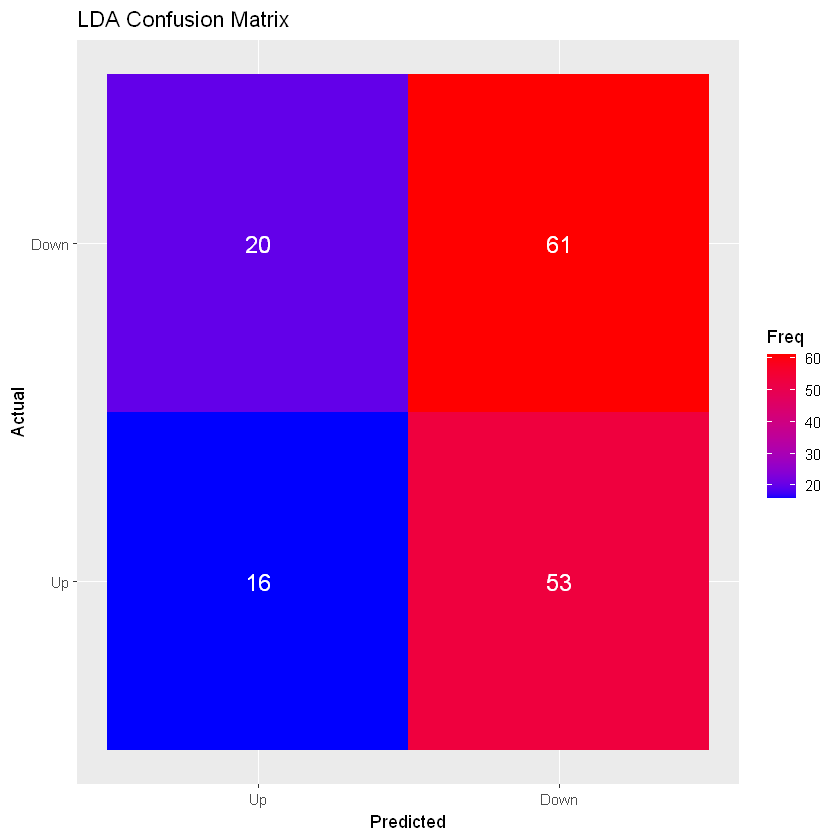

In [10]:
# Plot Confusion Matrix for LDA Predictions
plot_conf_matrix <- function(cm, title) {
  df <- as.data.frame(cm$table)
  ggplot(df, aes(Prediction, Reference, fill = Freq)) +
    geom_tile() +
    geom_text(aes(label = Freq), color = "white", size = 5) +
    scale_fill_gradient(low = "blue", high = "red") +
    labs(title = title, x = "Predicted", y = "Actual")
}

plot_conf_matrix(lda_cm, "LDA Confusion Matrix")


In [11]:
accuracies <- data.frame(
  Model = c("LDA", "QDA", "Naive Bayes"),
  Accuracy = c(lda_cm$overall['Accuracy'], 
               qda_cm$overall['Accuracy'], 
               nb_cm$overall['Accuracy'])
)

print(accuracies)


        Model  Accuracy
1         LDA 0.5133333
2         QDA 0.5400000
3 Naive Bayes 0.5133333
